In [39]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns
sns.set_style("white")

In [2]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
bookdataset = "../data/BBDD_EDA/BooksDatasetClean.csv"
df = pd.read_csv(bookdataset)

def clean_bookdataset(df):
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].str.replace("by ", "")
            df[column] = df[column].str.replace("by", "")
            df[column] = df[column].str.replace("by", "")
            df.replace({'nan': np.nan}, inplace=True)
    # para eliminar lineas sin título        
    df.drop(df[df["title"] == ""].index, inplace=True)
    df["authors"] = np.where(df["authors"] == "", "unknown", df["authors"])    
    return df

df_bd = clean_bookdataset(df)

In [3]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103063 entries, 0 to 103062
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    103063 non-null  object 
 1   authors                  103063 non-null  object 
 2   description              70204 non-null   object 
 3   category                 76902 non-null   object 
 4   publisher                103055 non-null  object 
 5   price_starting_with_($)  103063 non-null  float64
 6   publish_date_(month)     103063 non-null  object 
 7   publish_date_(year)      103063 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ MB


In [4]:
# Para eliminar duplicados sin autor
df_duplicated = df_bd[df_bd["title"].duplicated()].sort_values(by= "authors", ascending= True)

In [5]:
df_duplicated.shape

(5954, 8)

In [6]:
df_bd.drop(df_duplicated[df_duplicated["authors"] == "Unknown"].index, inplace= True)

In [7]:
# para eliminar duplicados quedándonos con el primer año de publicación del mismo título
df_bd.sort_values(by="publish_date_(year)", inplace=True)
df_bd.drop_duplicates("title", inplace=True)

In [8]:
df_bd[df_bd["authors"] == "unknown"].head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
88283,better homes and gardens annual recipes 2009 (...,unknown,NaN,NaN,better homes and gardens,6.89,january,1828


In [9]:
df_bd.head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755


In [10]:
# Dividir la columna 'category' por comas en un número dinámico de columnas
category_cols = df_bd['category'].str.split(',', expand=True)

# Eliminar espacios en blanco de las columnas resultantes
category_cols = category_cols.apply(lambda x: x.str.strip())

# Renombrar las columnas de categorías de forma dinámica
category_cols.columns = [f'category_{i+1}' for i in range(category_cols.shape[1])]

# Unir las nuevas columnas al DataFrame original
df_bd = pd.concat([df_bd, category_cols], axis=1)


In [11]:
df_bd["category_1"].value_counts()

category_1
fiction                            16857
juvenile fiction                    6406
religion                            4905
cooking                             3803
juvenile nonfiction                 3027
business & economics                2876
history                             2282
biography & autobiography           2050
political science                   1886
health & fitness                    1735
social science                      1665
travel                              1629
young adult fiction                 1464
family & relationships              1428
sports & recreation                 1217
self-help                           1209
humor                               1027
crafts & hobbies                     991
reference                            988
science                              983
house & home                         975
computers                            957
psychology                           928
medical                              771
garde

In [12]:
df_bd[df_bd["category_1"] == "fiction"]["category_2"].value_counts()

category_2
romance                           3122
general                           2342
mystery & detective               2268
thrillers                         1968
literary                          1464
science fiction                    837
historical                         684
fantasy                            614
classics                           348
christian                          322
religious                          285
short stories (single author)      252
women                              250
action & adventure                 228
humorous                           218
family life                        196
sagas                              152
psychological                      148
war & military                     141
anthologies (multiple authors)     134
westerns                           112
horror                             101
contemporary women                  91
political                           61
legal                               55
media tie-in  

In [13]:
df_bd["category_resumen_1"] = np.where(df_bd['category_1'] == 'fiction', df_bd['category_2'], df_bd['category_1'])

In [14]:
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'general', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'literary', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'thrillers', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'mystery & detective', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'christian', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religious', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religion', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'political science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'social science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'historical', "history", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'crafts & hobbies', "crafts, hobbies & home", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'house & home', "crafts, hobbies & home", df_bd["category_resumen_1"])

In [16]:
df_bd["category_resumen_1"].value_counts().head(10)

category_resumen_1
juvenile fiction                6406
religion & spirituality         5512
mystery, thriller & suspense    4236
literary & fiction              3806
cooking                         3803
politics & social sciences      3551
romance                         3122
juvenile nonfiction             3027
history                         2966
business & economics            2876
Name: count, dtype: int64

In [17]:
# Para generar variable top_10 de categorías
top_10_categories = df_bd["category_resumen_1"].value_counts().nlargest(10).index
df_bd['category_top_10'] =  np.nan
df_bd['category_top_10'] = np.where(df_bd['category_resumen_1'].isna(), np.nan, np.where(df_bd['category_resumen_1'].isin(top_10_categories), df_bd['category_resumen_1'], 'others'))

In [142]:
# Nueva columna de rangos de décadas
bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']

df_bd['year_range'] = pd.cut(df_bd['publish_date_(year)'], bins=bins, labels=labels)

In [133]:
df_bd.head(1)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990


In [19]:
# para eliminar las columnas de categorías a partir de la categoría 2. Esas no las vamos a tener en cuenta
df_bd.drop(df_bd.loc[:,"category_3":"category_15"], axis=1, inplace= True)

In [22]:
# para eliminar las otras columnas innecesarias para el análisis posterior
df_bd.drop(df_bd.loc[:,["description","category","publish_date_(month)", "category_1", "category_2" ]], axis=1, inplace= True)

In [143]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97109 entries, 45462 to 72814
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   title                    97109 non-null  object  
 1   authors                  97109 non-null  object  
 2   publisher                97101 non-null  object  
 3   price_starting_with_($)  97109 non-null  float64 
 4   publish_date_(year)      97109 non-null  int64   
 5   category_resumen_1       72046 non-null  object  
 6   category_top_10          72046 non-null  object  
 7   year_range               97109 non-null  category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


### Hipótesis 1
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

In [144]:
# para una primera hipótesis, vamos a cargar el dataset filtrado anterior en una nueva variable
df_bd_h1 = df_bd.copy()

In [145]:
df_bd_h1.head(3)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990
100864,the rainy day book: pick-me-ups for when you'r...,mark gilroy communications,"j. countryman/thomas nelson, inc.",5.29,1787,NaN,NaN,before 1990
65356,how to be the funniest kid in the whole wide w...,jay leno,simon & schuster,5.29,1793,NaN,NaN,before 1990


In [147]:
# Primero ordenamos los datos por año de publi, por si estuvieran desordenados
df_bd_h1.sort_values("publish_date_(year)", ascending= True, inplace=True)

In [148]:
df_bd_h1.head(1)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990


In [149]:
# Para graficar los datos referidos a publicaciones totales por década.
titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')

C:\Users\anusk\AppData\Local\Temp\ipykernel_2564\4005696078.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')


In [150]:
titles_decade_count

,year_range,title_count
0,before 1990,25089
1,1990-1994,14175
2,1995-1999,19405
3,2000-2004,20300
4,2005-2009,15430
5,2010-2014,2491
6,2015-2019,164
7,after 2019,55


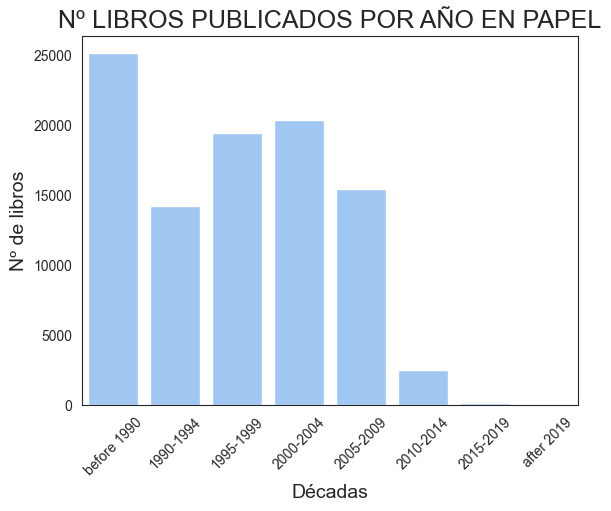

In [151]:
sns.barplot(titles_decade_count, x = "year_range", y = "title_count")
plt.xticks(rotation= 45)
plt.title('Nº LIBROS PUBLICADOS POR AÑO EN PAPEL', fontsize=18)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);


Otros análisis desde este dataset:


Primero vamos a obtener el número de libros publicado por género por cada década

In [158]:
generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_2564\1900853679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [159]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [160]:
generos_decada_piv

category_top_10,business & economics,cooking,history,juvenile fiction,juvenile nonfiction,literary & fiction,"mystery, thriller & suspense",others,politics & social sciences,religion & spirituality,romance
year_range,,,,,,,,,,,
before 1990,299,706,703,906,476,786,452,4979,623,859,67
1990-1994,514,779,505,751,537,784,419,4863,566,658,181
1995-1999,838,1017,578,1371,790,839,774,7769,639,1248,428
2000-2004,737,803,652,1741,832,813,1034,8060,784,1483,908
2005-2009,439,435,458,1414,347,486,1231,6025,813,1057,1221
2010-2014,42,60,65,169,35,88,318,974,123,191,308
2015-2019,5,2,5,32,8,5,3,63,3,13,6
after 2019,2,1,0,22,2,5,5,8,0,3,3


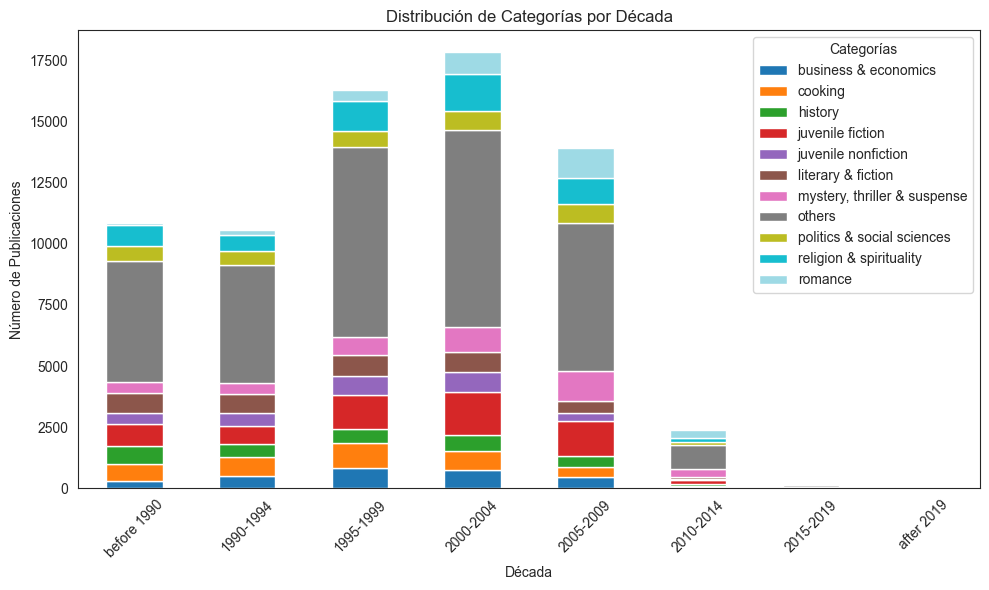

In [161]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [163]:
others_genre = generos_decada_piv["others"]
others_genre = others_genre.reset_index(name="others").set_index("year_range").T

In [164]:
others_genre

year_range,before 1990,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,after 2019
others,4979,4863,7769,8060,6025,974,63,8


In [165]:
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

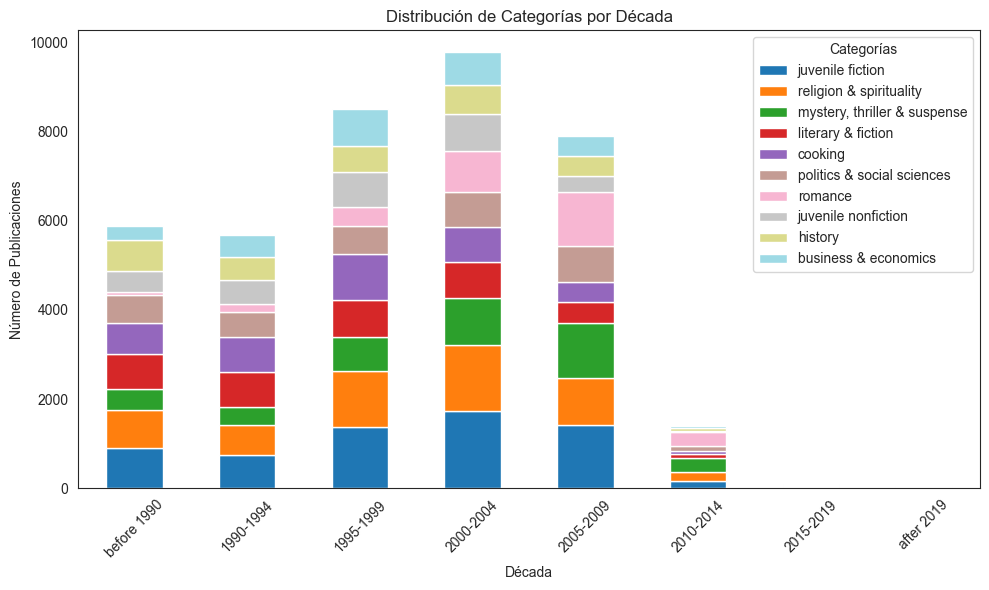

In [166]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [167]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  72046


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [168]:
totales_decada = generos_decada_piv.sum(axis=1)

In [169]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [173]:
generos_decada_per

category_top_10,others,juvenile fiction,religion & spirituality,"mystery, thriller & suspense",literary & fiction,cooking,politics & social sciences,romance,juvenile nonfiction,history,business & economics
year_range,,,,,,,,,,,
before 1990,45.864038,8.345615,7.912675,4.163596,7.240236,6.503316,5.738762,0.617170,4.384672,6.475682,2.754237
1990-1994,46.064223,7.113763,6.232831,3.968931,7.426352,7.378990,5.361372,1.714502,5.086672,4.783556,4.868807
1995-1999,47.688908,8.415690,7.660672,4.751090,5.150083,6.242711,3.922411,2.627217,4.849303,3.547971,5.143945
2000-2004,45.161652,9.755141,8.309520,5.793691,4.555387,4.499356,4.392895,5.087690,4.661848,3.653275,4.129546
2005-2009,43.264398,10.153669,7.590119,8.839581,3.489875,3.123654,5.838001,8.767773,2.491742,3.288812,3.152377
2010-2014,41.045091,7.121787,8.048883,13.400759,3.708386,2.528445,5.183312,12.979351,1.474926,2.739149,1.769912
2015-2019,43.448276,22.068966,8.965517,2.068966,3.448276,1.379310,2.068966,4.137931,5.517241,3.448276,3.448276
after 2019,15.686275,43.137255,5.882353,9.803922,9.803922,1.960784,0.000000,5.882353,3.921569,0.000000,3.921569


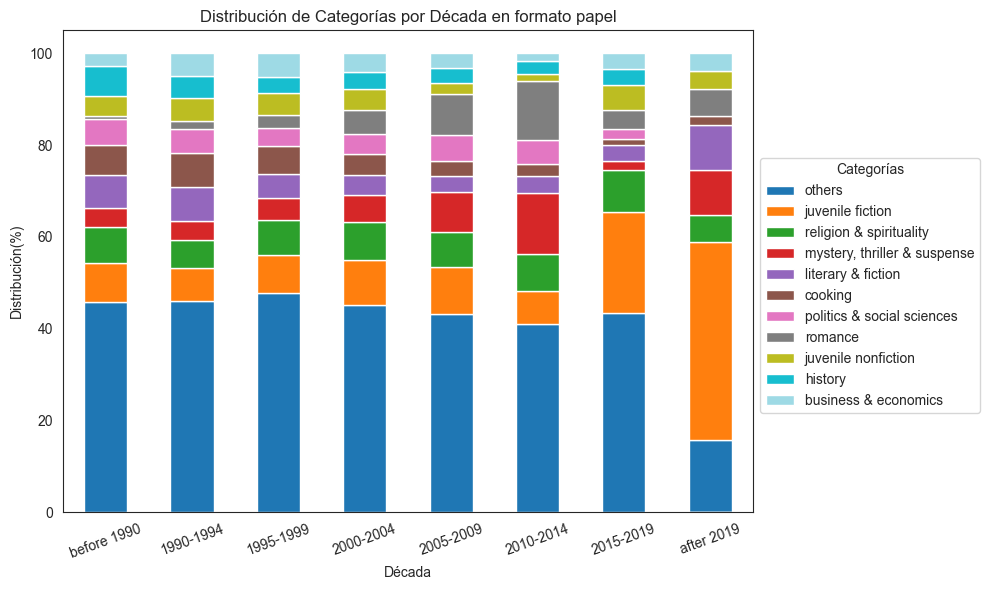

In [171]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década en formato papel')
plt.ylabel('Distribución(%)')
plt.xlabel('Década')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [172]:
generos_decada_piv.sum(axis=1)

year_range
before 1990    10856
1990-1994      10557
1995-1999      16291
2000-2004      17847
2005-2009      13926
2010-2014       2373
2015-2019        145
after 2019        51
dtype: int64